In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.getcwd()
os.chdir("/content/drive/MyDrive/Colab_Notebooks/Digit_identification")
!ls

'/content'

In [ ]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [ ]:
Y_train=train["label"]
X_train=train.drop(labels=["label"],axis=1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

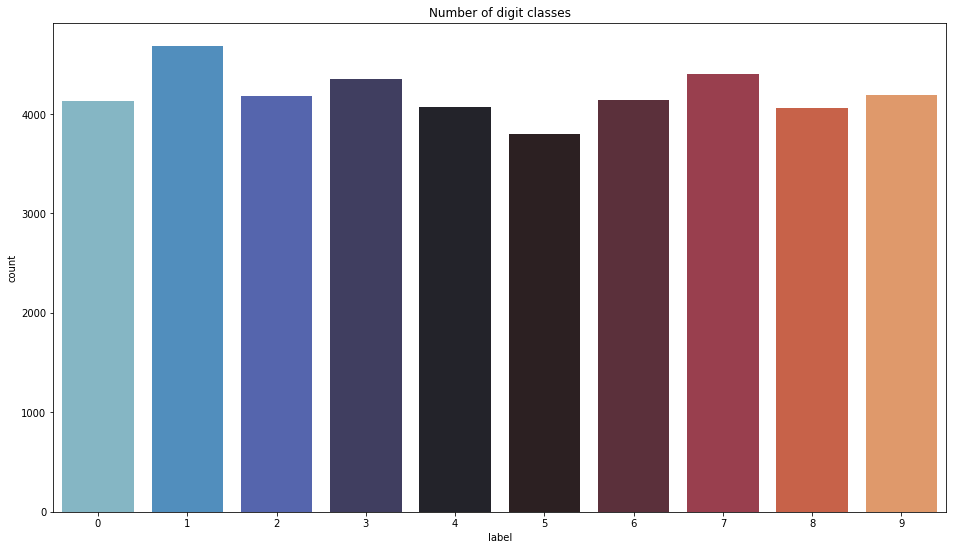

In [ ]:
plt.figure(figsize=(16,9))
g=sns.countplot(Y_train,palette="icefire")
plt.title("Number of digit classes")
Y_train.value_counts()

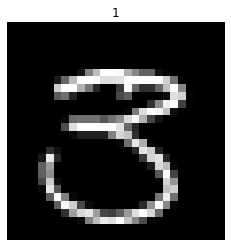

In [ ]:
img=X_train.iloc[7].to_numpy()
img=img.reshape((28,28))
plt.imshow(img,cmap="gray")
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

In [ ]:
#Normalize the data
X_train=X_train/255.0
test=test/255.0
print(X_train.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [ ]:
X_train=X_train.to_numpy().reshape(42000,28,28,1)
test=test.to_numpy().reshape(-1,28,28,1)
print("X_train shape:", X_train.shape)
print("test shape:", test.shape)


AttributeError: ignored

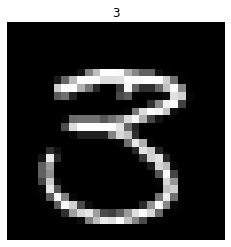

In [ ]:
img=X_train[7]
plt.imshow(img[:,:,0],cmap="gray")
plt.title(Y_train[7])
plt.axis("off")
plt.show()

In [ ]:
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes=10)

In [ ]:
# Split the train data and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


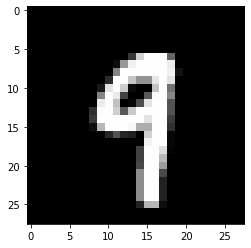

In [ ]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [ ]:


# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))



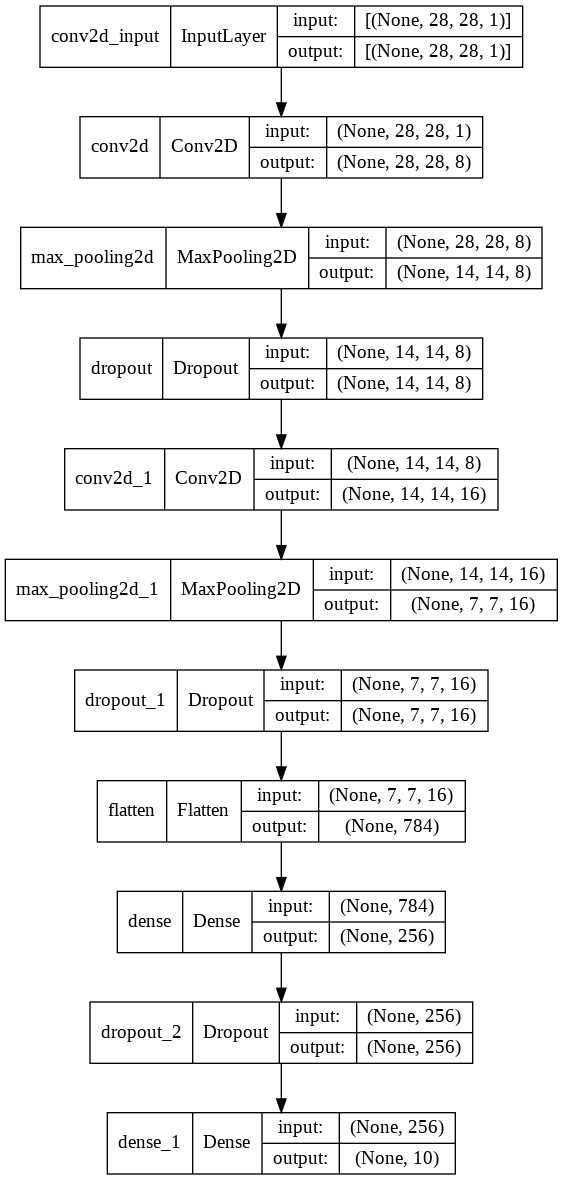

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True
)


In [ ]:
# Define the optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
epochs = 10  # for better result increase the epochs
batch_size = 250

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

In [ ]:
#Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 23s 147ms/step - loss: 1.1361 - accuracy: 0.6195 - val_loss: 0.2182 - val_accuracy: 0.9445
Epoch 2/10
151/151 [==============================] - 21s 140ms/step - loss: 0.4454 - accuracy: 0.8609 - val_loss: 0.1503 - val_accuracy: 0.9567
Epoch 3/10
151/151 [==============================] - 26s 169ms/step - loss: 0.3208 - accuracy: 0.8987 - val_loss: 0.1137 - val_accuracy: 0.9660
Epoch 4/10
151/151 [==============================] - 24s 159ms/step - loss: 0.2710 - accuracy: 0.9153 - val_loss: 0.0949 - val_accuracy: 0.9724
Epoch 5/10
151/151 [==============================] - 22s 142ms/step - loss: 0.2385 - accuracy: 0.9257 - val_loss: 0.0821 - val_accuracy: 0.9757
Epoch 6/10
151/151 [==============================] - 22s 144ms/step - loss: 0.2170 - accuracy: 0.9332 - val_loss: 0.0764 - val_accuracy: 0.9776
Epoch 7/10
151/151 [==============================] - 22s 143ms/step - loss: 0.2021 - accuracy: 0.9382 - val_loss: 0.0735 - val_ac

In [ ]:
!pip install h5py pyyaml

In [ ]:
model.save('my_model.h5')

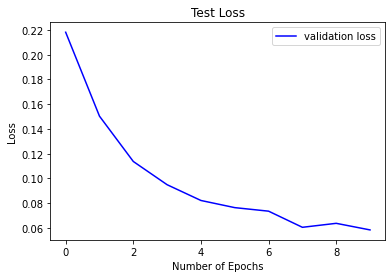

In [ ]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

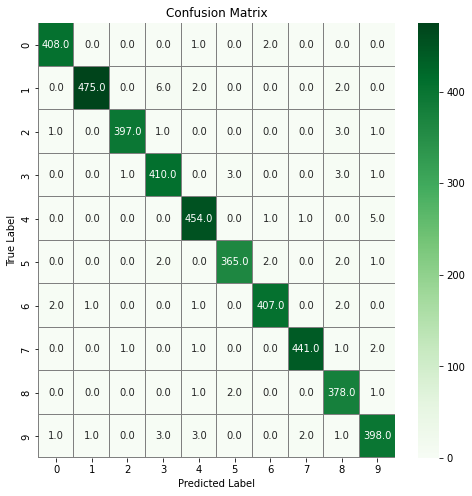

In [ ]:
# confusion matrix

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:

def pred_prob(indeks):
  for i in range(len(Y_pred[indeks])):
    print(f'Prawdopodobieństwo dla:{i} wynosi {str(round(Y_pred[indeks][i]*100, 2))} %')
  img=X_val[indeks]
  plt.imshow(img[:,:,0],cmap="gray")
  for i in range(len(Y_val[indeks])):
    if Y_val[indeks][i]==1:
      Y=i
  plt.title(Y)


  plt.axis("off")
  plt.show()

In [ ]:
Y_val[5][2] == 1

True

In [ ]:
X_val[1].shape

(28, 28, 1)

Wybierz który element chcesz sprawdzić byczq:
420
Prawdopodobieństwo dla:0 wynosi 0.0 %
Prawdopodobieństwo dla:1 wynosi 0.0 %
Prawdopodobieństwo dla:2 wynosi 0.0 %
Prawdopodobieństwo dla:3 wynosi 0.0 %
Prawdopodobieństwo dla:4 wynosi 0.0 %
Prawdopodobieństwo dla:5 wynosi 0.0 %
Prawdopodobieństwo dla:6 wynosi 100.0 %
Prawdopodobieństwo dla:7 wynosi 0.0 %
Prawdopodobieństwo dla:8 wynosi 0.0 %
Prawdopodobieństwo dla:9 wynosi 0.0 %


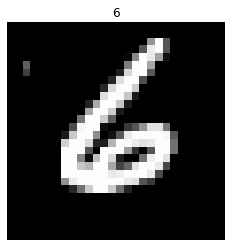

In [ ]:
print("Wybierz który element chcesz sprawdzić byczq:")
n=int(input())
pred_prob(n)

In [ ]:
mistake = np.argmax(Y_val,axis = 1)!=np.argmax(Y_pred,axis=1)
x=[i for i,x in enumerate(mistake) if x]
print(x)


[7, 197, 262, 404, 425, 526, 556, 641, 664, 665, 699, 758, 766, 850, 892, 921, 949, 995, 1070, 1101, 1104, 1148, 1174, 1318, 1394, 1442, 1446, 1642, 1684, 1741, 1768, 1890, 1910, 1934, 1980, 2120, 2271, 2366, 2382, 2427, 2429, 2488, 2492, 2572, 2614, 2620, 2763, 2775, 2811, 2826, 2890, 2953, 2965, 3052, 3078, 3106, 3151, 3219, 3299, 3543, 3556, 3585, 3780, 3895, 4087, 4198, 4199]


In [ ]:
#for i in range(len(x)):
 # pred_prob(x[i])

In [ ]:
from matplotlib import image
image=image.imread("2.png")
print(image.shape)

(500, 500, 3)


In [ ]:
img_gray=(image[:,:,0]+image[:,:,1]+image[:,:,2])/3
img_gray2=np.empty([500,500,1])
img_gray2[:,:,0]=img_gray

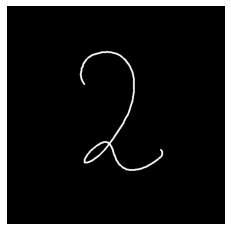

In [ ]:
img=img_gray2
plt.imshow(img[:,:,0],cmap="gray")
plt.axis("off")
plt.show()

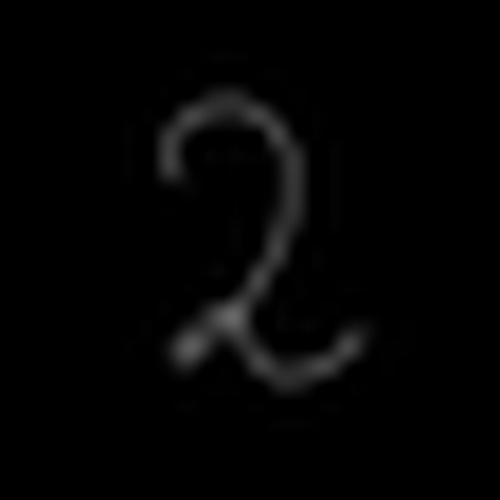

In [ ]:
from PIL import Image
img_gs=Image.open("2.png")
img_gs2=img_gs.resize((28,28),Image.ANTIALIAS)
img_gs3=img_gs2.resize((500,500),Image.ANTIALIAS)
img_gs3

In [ ]:
image_gs=np.asarray(img_gs2)
img_gray=(image_gs[:,:,0]+image_gs[:,:,1]+image_gs[:,:,2])/3

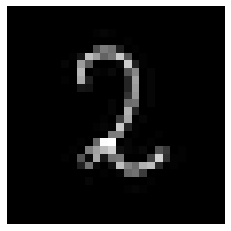

In [ ]:
img_gray.shape
img=img_gray
plt.imshow(img[:,:],cmap="gray")
plt.axis("off")
plt.show()